# PROJECT : BULLDOZER SALE PRICE

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train_dataset = pd.read_csv('G:/Software/Machine learning/Datasets/Bulldozers price/TrainAndValid.csv' , low_memory = False)
test_dataset = pd.read_csv('G:/Software/Machine learning/Datasets/Bulldozers price/test.csv')
valid_dataset = pd.read_csv('G:/Software/Machine learning/Datasets/Bulldozers price/valid.csv')

In [3]:
train_dataset.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_dataset.shape

(412698, 53)

In [5]:
train_dataset.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
test_dataset.shape

(12457, 52)

In [7]:
test_dataset.isnull().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
saledate                    412698 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                      

In [9]:
train_dataset.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [10]:
train_dataset.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

## EDA

<Figure size 1440x1080 with 0 Axes>

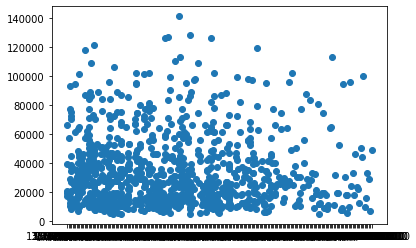

In [11]:
plt.figure(figsize = (20 , 15))
fig , ax = plt.subplots()
ax.scatter(train_dataset['saledate'][:1000] , train_dataset['SalePrice'][:1000])

In [12]:
train_dataset.saledate[:10]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

In [13]:
train_dataset.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

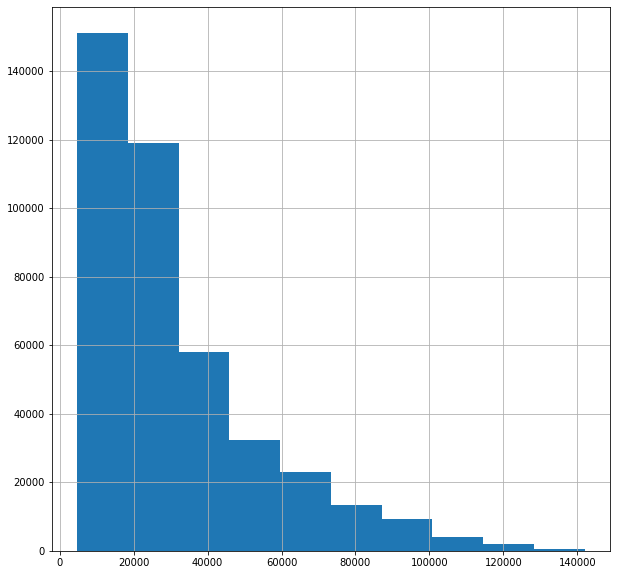

In [14]:
plt.figure(figsize = (10 , 10))
train_dataset.SalePrice.hist()

#### Now Change the Date format.We change the format because we can visualize the SCATTER-PLOT properly and find out more information.

In [15]:
new_train_dataset = train_dataset = pd.read_csv('G:/Software/Machine learning/Datasets/Bulldozers price/TrainAndValid.csv' , low_memory = False , parse_dates = ['saledate'])

In [16]:
new_train_dataset.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

Now Date is in proper format.Now visualize the scatter plot graph

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


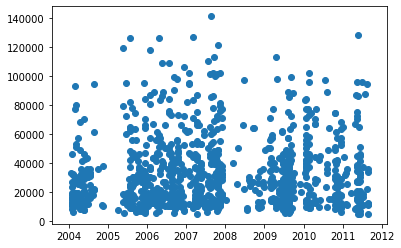

In [17]:
fig , ax = plt.subplots()
ax.scatter(new_train_dataset['saledate'][:1000] , new_train_dataset['SalePrice'][:1000])

It is not much clear which year the company sale mostof their bulldozers.But it show a little bit information about sales bulldozers

In [18]:
new_train_dataset.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [19]:
## Now convert the date into ascending order for better understanding.

new_train_dataset.sort_values(by = ['saledate'] , inplace = True , ascending = True)
new_train_dataset.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [20]:
new_train_dataset.saledate[:20]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

Now the date is in ascending format.

In [21]:
train_dataset = new_train_dataset.copy()
train_dataset.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Engineering

Now make some additional columns from Date column.

In [22]:
train_dataset['year'] = train_dataset.saledate.dt.year
train_dataset.year

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: year, Length: 412698, dtype: int64

In [23]:
train_dataset['month'] = train_dataset.saledate.dt.month
train_dataset.month

205615    1
274835    1
141296    1
212552    1
62755     1
         ..
410879    4
412476    4
411927    4
407124    4
409203    4
Name: month, Length: 412698, dtype: int64

In [24]:
train_dataset['day'] = train_dataset.saledate.dt.day
train_dataset.day

205615    17
274835    31
141296    31
212552    31
62755     31
          ..
410879    28
412476    28
411927    28
407124    28
409203    28
Name: day, Length: 412698, dtype: int64

In [25]:
train_dataset.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31


In [26]:
train_dataset['dayofyear'] = train_dataset.saledate.dt.dayofyear
train_dataset.dayofyear

205615     17
274835     31
141296     31
212552     31
62755      31
         ... 
410879    119
412476    119
411927    119
407124    119
409203    119
Name: dayofyear, Length: 412698, dtype: int64

In [27]:
train_dataset['dayofweek'] = train_dataset.saledate.dt.dayofweek
train_dataset.dayofweek

205615    1
274835    1
141296    1
212552    1
62755     1
         ..
410879    5
412476    5
411927    5
407124    5
409203    5
Name: dayofweek, Length: 412698, dtype: int64

In [28]:
train_dataset.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [29]:
# Drop the DATE column
train_dataset.drop(['saledate'] , axis = 1)
train_dataset.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,dayofyear,dayofweek
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,17,1
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31,1
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,31,1
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31,1
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,31,1


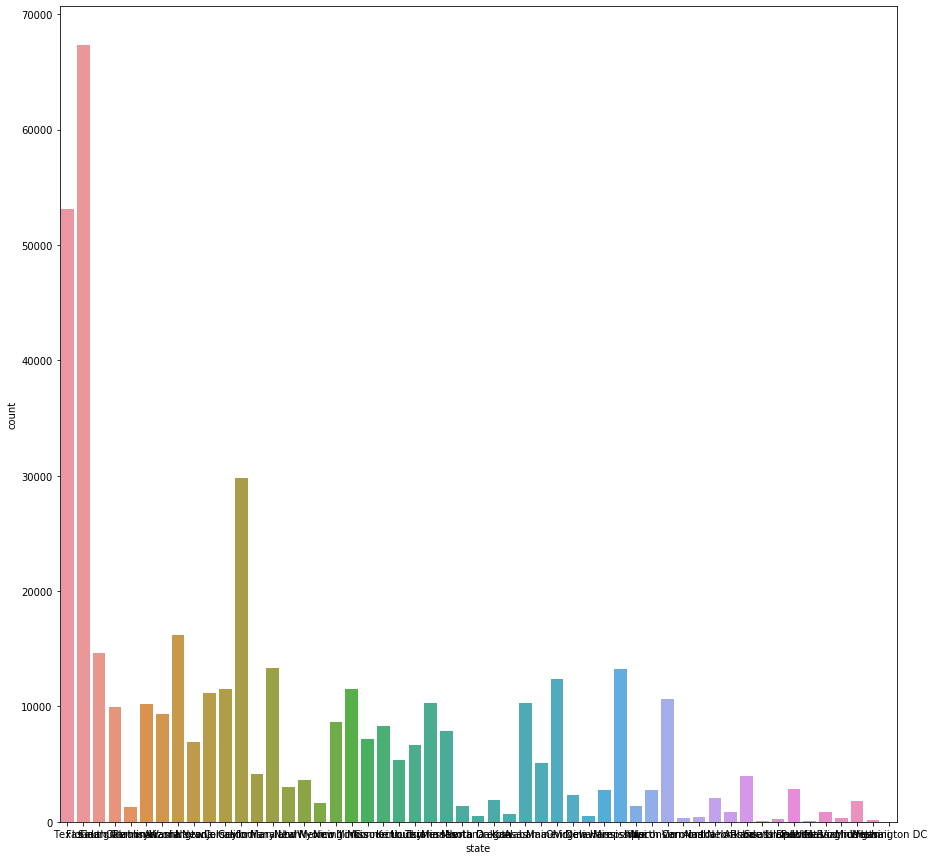

In [30]:
# Now check which state have most sale record
import seaborn as sns

plt.figure(figsize = (15 , 15))
sns.countplot(x = 'state' , data = train_dataset)

In [31]:
train_dataset.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Data Preprocessing

There are too many columns which are Categorical type or object type.First find out those columns.

In [32]:
for label , content in train_dataset.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Those are the String columns

In [33]:
# Now convert those column type to categorical

for label , content in train_dataset.items():
    if pd.api.types.is_string_dtype(content):
        train_dataset[label] = content.astype('category').cat.as_ordered()

In [34]:
train_dataset.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,dayofyear,dayofweek
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,17,1
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31,1
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,31,1
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,31,1
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,31,1


In [35]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null category
saledate                    412698 non-null datetime64[ns]
fiModelDesc                 412698 non-null category
fiBaseModel                 412698 non-null category
fiSecondaryDesc             271971 non-null category
fiModelSeries               58667 non-null category
fiModelDescriptor           74816 non-null category
ProductSize                 196093 non-null category
fiProductClassDesc          412698 non-null categor

In [36]:
train_dataset.Coupler_System.cat.categories

Index(['None or Unspecified', 'Yes'], dtype='object')

In [37]:
train_dataset.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [38]:
train_dataset.isnull().sum()/len(train_dataset)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

In [39]:
for label , content in train_dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
year
month
day
dayofyear
dayofweek


In [40]:
train_dataset.SalesID

205615    1646770
274835    1821514
141296    1505138
212552    1671174
62755     1329056
           ...   
410879    6302984
412476    6324811
411927    6313029
407124    6266251
409203    6283635
Name: SalesID, Length: 412698, dtype: int64

In [41]:
# check which numeric columns have null values

for label , content in train_dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


Only two numeric columns have missing values.

Now check how many string columns have missing values.

In [42]:
# check which string value columns have null values

for label , content in train_dataset.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


So many columns have missing values.

In [43]:
# Fill numeric rows with the median

for label, content in train_dataset.items():
    
    if pd.api.types.is_numeric_dtype(content):
        
        if pd.isnull(content).sum():
            
            train_dataset[label+"_is_missing"] = pd.isnull(content)
            
            train_dataset[label] = content.fillna(content.median())

In [44]:
# check which numeric columns have null values

for label , content in train_dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

There is no missing values in numeric columns.

Now check how many columns still have missing values.

In [45]:
train_dataset.isnull().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
saledate                                    0
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                         

In [46]:
pd.Categorical(train_dataset['state'])

[Texas, Florida, Florida, Florida, Florida, ..., California, California, California, California, California]
Length: 412698
Categories (53, object): [Alabama < Alaska < Arizona < Arkansas ... Washington DC < West Virginia < Wisconsin < Wyoming]

In [47]:
pd.Categorical(train_dataset['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [48]:
# Convert Categorical columns into numeric

for label, content in train_dataset.items():
    
    if not pd.api.types.is_numeric_dtype(content):
        
        train_dataset[label+"_is_missing"] = pd.isnull(content)
        
        train_dataset[label] = pd.Categorical(content).codes+1

In [49]:
train_dataset.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,1,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True


In [50]:
train_dataset.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [51]:
train_dataset.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 105, dtype: int64

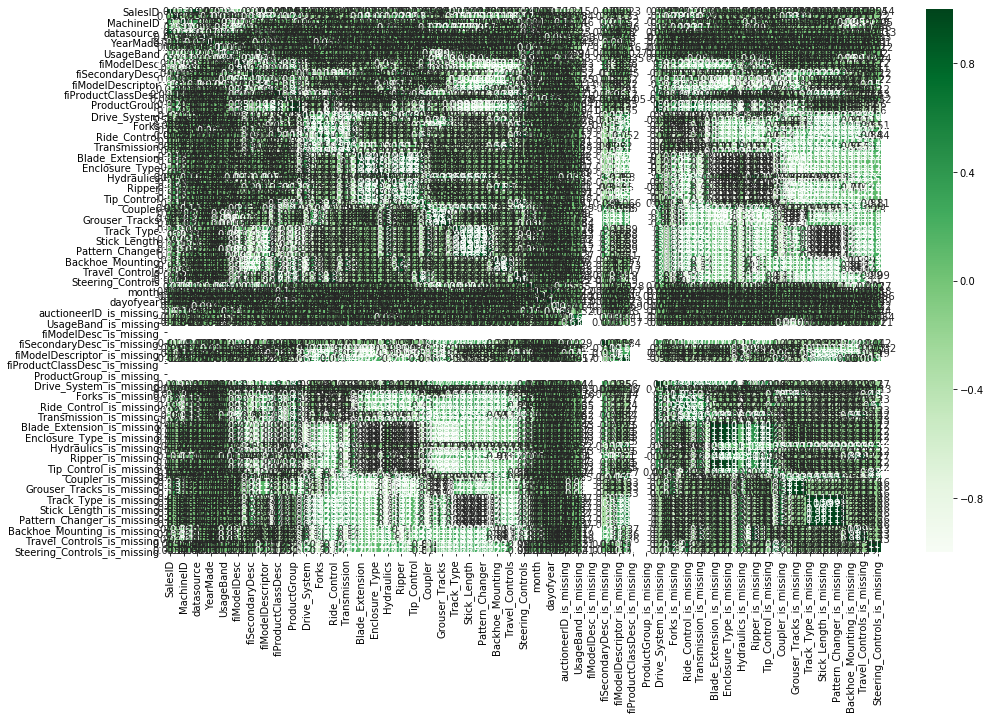

In [52]:
plt.figure(figsize = (16,10)) 
sns.heatmap(train_dataset.corr() , annot = True , cmap = 'Greens')

## Build Model

In [54]:
# Split data into training and validation
df_val = train_dataset[train_dataset.year == 2012]
df_train = train_dataset[train_dataset.year != 2012]

In [55]:
df_train

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,1,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393098,6260687,29000.0,1074871,4331,149,2.0,1000,0.0,0,3919,...,True,True,True,True,True,True,True,True,False,False
400217,6312170,11000.0,1812622,9580,149,2.0,2005,0.0,0,3919,...,True,True,True,True,True,True,True,True,True,True
400302,6312727,11000.0,1811599,9580,149,2.0,2005,0.0,0,3919,...,True,True,True,True,True,True,True,True,True,True
400393,6315051,18000.0,1858173,17432,149,2.0,2004,0.0,0,3919,...,True,True,True,True,True,True,True,True,True,True


In [56]:
df_train.shape

(401125, 105)

In [57]:
X_train, y_train = df_train.drop("SalePrice", axis=1) , df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1) , df_val.SalePrice

In [58]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 104), (401125,), (11573, 104), (11573,))

In [59]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,1,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,2,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,2,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393098,6260687,1074871,4331,149,2.0,1000,0.0,0,3919,3137,...,True,True,True,True,True,True,True,True,False,False
400217,6312170,1812622,9580,149,2.0,2005,0.0,0,3919,4514,...,True,True,True,True,True,True,True,True,True,True
400302,6312727,1811599,9580,149,2.0,2005,0.0,0,3919,4514,...,True,True,True,True,True,True,True,True,True,True
400393,6315051,1858173,17432,149,2.0,2004,0.0,0,3919,3389,...,True,True,True,True,True,True,True,True,True,True


In [60]:
y_valid

405675    46173.2
401133    66000.0
406076    26800.0
409018    42100.0
409026    62100.0
           ...   
410879    16000.0
412476     6000.0
411927    16000.0
407124    55000.0
409203    34000.0
Name: SalePrice, Length: 11573, dtype: float64

### Building Evalution-Matrix

In [62]:
def rmsle(y_test, y_preds):

    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [63]:
# Create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

### Apply Random Forest

In [74]:
%%time

model = RandomForestRegressor(n_jobs = -1 , random_state=42)
model.fit(X_train , y_train)

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 1min 9s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [75]:
show_scores(model)

{'Training MAE': 1767.5540656902463,
 'Valid MAE': 6507.3356519485005,
 'Training RMSLE': 0.09725415702483153,
 'Valid RMSLE': 0.2718981414085072,
 'Training R^2': 0.982412962678691,
 'Valid R^2': 0.8581541539233315}

In [87]:
n_folds = 5
parameters = {'min_samples_split': range(2 , 20 , 2)}

dtree = RandomForestRegressor(random_state = 100)

tree_split = RandomizedSearchCV(dtree, parameters , cv=n_folds , n_jobs = -1 , return_train_score = True)
tree_split.fit(X_train, y_train)


cv_results_ms = pd.DataFrame(tree_split.cv_results_)
cv_results_ms

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,161.730451,1.249598,1.543231,0.197516,2,{'min_samples_split': 2},0.638129,0.805065,0.853664,0.849836,...,0.791497,0.079179,9,0.982522,0.982726,0.982238,0.982282,0.982501,0.982454,0.000177
1,162.376998,5.777096,1.618702,0.102944,4,{'min_samples_split': 4},0.640006,0.808642,0.854502,0.849317,...,0.792905,0.078701,8,0.979368,0.979703,0.979031,0.979205,0.979480,0.979358,0.000230
2,163.526454,3.079370,1.323406,0.167662,6,{'min_samples_split': 6},0.643297,0.808127,0.855667,0.848760,...,0.793962,0.077603,7,0.975369,0.975555,0.974814,0.974990,0.975377,0.975221,0.000275
3,137.593608,10.177654,1.166207,0.076230,8,{'min_samples_split': 8},0.643189,0.809361,0.856319,0.850843,...,0.794676,0.078076,6,0.971098,0.971287,0.970339,0.970481,0.971113,0.970863,0.000379
4,147.574458,7.490359,1.418962,0.197590,10,{'min_samples_split': 10},0.643156,0.811509,0.856454,0.848991,...,0.794801,0.077945,5,0.967041,0.967184,0.966132,0.966243,0.966956,0.966711,0.000435
5,165.442217,1.853683,1.407548,0.123648,12,{'min_samples_split': 12},0.643021,0.811647,0.857070,0.851297,...,0.795833,0.078536,4,0.963184,0.963294,0.962134,0.962257,0.963065,0.962787,0.000489
6,164.447152,3.023203,1.380496,0.054642,14,{'min_samples_split': 14},0.645115,0.811919,0.857795,0.853078,...,0.796581,0.078046,2,0.959603,0.959717,0.958500,0.958601,0.959506,0.959185,0.000523
7,167.649328,3.366638,1.474409,0.113143,16,{'min_samples_split': 16},0.643133,0.812458,0.858005,0.852627,...,0.796049,0.078759,3,0.956231,0.956357,0.955106,0.955245,0.956274,0.955843,0.000548
8,163.228963,32.024090,1.461031,0.165128,18,{'min_samples_split': 18},0.643537,0.812738,0.858005,0.853308,...,0.796639,0.078786,1,0.953131,0.953268,0.951989,0.952128,0.953186,0.952740,0.000560


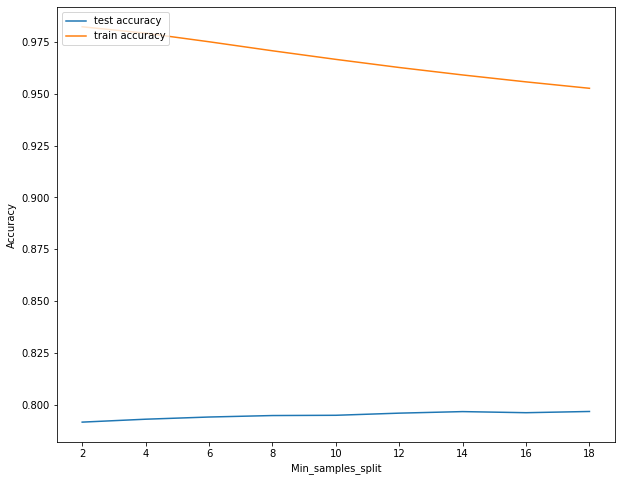

In [88]:
plt.figure(figsize=(10 , 8))
plt.plot(cv_results_ms['param_min_samples_split'] , cv_results_ms['mean_test_score'])
plt.plot(cv_results_ms['param_min_samples_split'] , cv_results_ms['mean_train_score'])
plt.xlabel('Min_samples_split')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

In [90]:
n_folds = 5
parameters = {'min_samples_leaf': range (1 , 20 , 2)}

dtree = RandomForestRegressor()

tree_ml = RandomizedSearchCV(dtree , parameters , cv=n_folds , n_jobs = -1 , return_train_score = True)
tree_ml.fit(X_train, y_train)


cv_results_ml = pd.DataFrame(tree_ml.cv_results_)
cv_results_ml

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,166.233174,4.829819,1.703598,0.296955,1,{'min_samples_leaf': 1},0.644296,0.811072,0.855758,0.848083,...,0.794158,0.077137,3,0.982816,0.982738,0.982210,0.982368,0.982426,0.982512,0.000229
1,146.467248,18.403850,1.164273,0.132965,3,{'min_samples_leaf': 3},0.646812,0.810934,0.855438,0.846182,...,0.793935,0.075782,4,0.968129,0.967307,0.966413,0.966361,0.966932,0.967028,0.000651
2,127.833760,5.977457,1.322922,0.112820,5,{'min_samples_leaf': 5},0.633703,0.820619,0.859106,0.851558,...,0.797000,0.083171,1,0.954012,0.953232,0.951534,0.952333,0.953003,0.952823,0.000839
3,147.253799,9.345835,1.103198,0.106208,7,{'min_samples_leaf': 7},0.632815,0.817379,0.859779,0.850002,...,0.795044,0.082989,2,0.942964,0.943036,0.941329,0.941574,0.942629,0.942306,0.000716
4,115.721340,1.334638,1.006562,0.041947,9,{'min_samples_leaf': 9},0.636493,0.806002,0.855486,0.843723,...,0.791993,0.079717,6,0.936621,0.934810,0.932800,0.933765,0.934329,0.934465,0.001269
5,115.061176,2.396532,1.039356,0.041619,11,{'min_samples_leaf': 11},0.622675,0.817618,0.856581,0.846252,...,0.792382,0.086206,5,0.929086,0.928665,0.926349,0.927119,0.928203,0.927884,0.001010
6,114.932859,2.346306,0.994558,0.023133,13,{'min_samples_leaf': 13},0.617870,0.817713,0.853360,0.845069,...,0.790215,0.087379,7,0.923213,0.923455,0.920773,0.921382,0.923000,0.922364,0.001078
7,110.003938,3.167215,0.998958,0.044515,15,{'min_samples_leaf': 15},0.620991,0.800540,0.852448,0.840202,...,0.785394,0.084272,9,0.921292,0.918865,0.916247,0.917004,0.918698,0.918421,0.001746
8,110.005940,3.539044,0.962244,0.049102,17,{'min_samples_leaf': 17},0.616813,0.817218,0.851796,0.845468,...,0.788251,0.087193,8,0.917088,0.914838,0.912333,0.913453,0.914417,0.914426,0.001586
9,90.276693,18.678350,0.850894,0.121076,19,{'min_samples_leaf': 19},0.606962,0.803618,0.846070,0.838672,...,0.781963,0.088857,10,0.911913,0.911647,0.908743,0.909743,0.911074,0.910624,0.001202


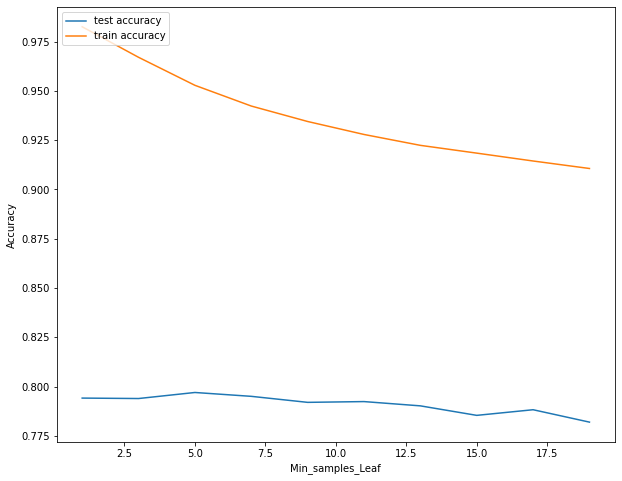

In [91]:
plt.figure(figsize=(10 , 8))
plt.plot(cv_results_ml['param_min_samples_leaf'] , cv_results_ml['mean_test_score'])
plt.plot(cv_results_ml['param_min_samples_leaf'] , cv_results_ml['mean_train_score'])
plt.xlabel('Min_samples_Leaf')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
#plt.xscale('log')

In [92]:
n_folds = 5
parameters = {'max_depth':range (1 , 15 , 2)}

dtree = RandomForestRegressor()

tree_d = RandomizedSearchCV(dtree , parameters , cv=n_folds , n_jobs = -1 , return_train_score = True)
tree_d.fit(X_train, y_train)


cv_results_d = pd.DataFrame(tree_d.cv_results_)
cv_results_d

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.002268,0.164785,0.800658,0.019343,1,{'max_depth': 1},0.137215,0.090830,0.105570,0.113275,...,0.115197,0.016542,7,0.125631,0.121213,0.120974,0.119154,0.114491,0.120293,0.003599
1,29.592377,0.744015,0.789080,0.021053,3,{'max_depth': 3},0.206785,0.476595,0.490836,0.450268,...,0.412665,0.104579,6,0.496627,0.474698,0.473901,0.466185,0.466410,0.475564,0.011126
2,45.011524,0.636903,0.775965,0.009116,5,{'max_depth': 5},0.363973,0.565770,0.590364,0.588794,...,0.529975,0.084930,5,0.652286,0.621308,0.599981,0.610649,0.617075,0.620260,0.017553
3,59.378335,0.705991,0.791872,0.015522,7,{'max_depth': 7},0.459168,0.637335,0.683706,0.687298,...,0.628183,0.086339,4,0.749440,0.722968,0.700167,0.715154,0.721488,0.721843,0.015985
4,71.966759,0.906048,0.827497,0.022495,9,{'max_depth': 9},0.474369,0.711735,0.753856,0.759388,...,0.689339,0.108764,3,0.818779,0.795546,0.785871,0.791018,0.798914,0.798026,0.011265
5,82.483265,1.009363,0.854917,0.014647,11,{'max_depth': 11},0.547533,0.767321,0.809635,0.808223,...,0.745542,0.100165,2,0.863500,0.853826,0.844715,0.849700,0.854946,0.853337,0.006224
6,83.139914,10.956677,0.766691,0.117723,13,{'max_depth': 13},0.594631,0.800400,0.833690,0.834452,...,0.774620,0.090968,1,0.899532,0.893414,0.887759,0.891004,0.894872,0.893316,0.003932


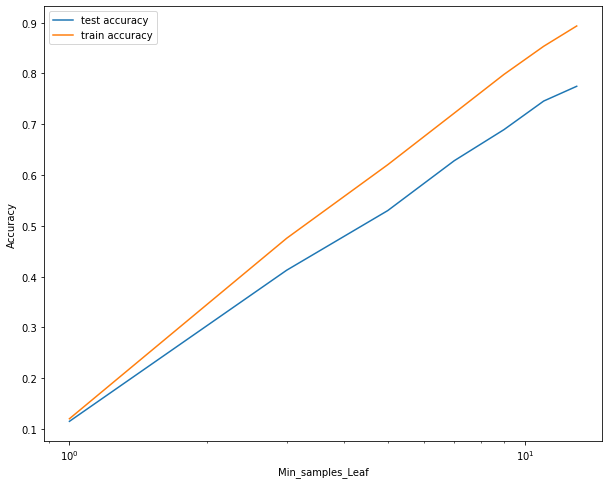

In [93]:
plt.figure(figsize=(10 , 8))
plt.plot(cv_results_d['param_max_depth'] , cv_results_d['mean_test_score'])
plt.plot(cv_results_d['param_max_depth'] , cv_results_d['mean_train_score'])
plt.xlabel('Min_samples_Leaf')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [94]:
print(tree_split.best_params_)
print(tree_ml.best_params_)
print(tree_d.best_params_)

{'min_samples_split': 18}
{'min_samples_leaf': 5}
{'max_depth': 13}


In [103]:

%%time

# Best hyperparamters
model = RandomForestRegressor(n_estimators=40, 
                                min_samples_leaf = 5,
                                min_samples_split = 18,
                                max_features=0.5,
                                n_jobs=-1,
                                random_state=42)


model.fit(X_train, y_train)

show_scores(model)

Wall time: 1min 49s


{'Training MAE': 3401.272294802888,
 'Valid MAE': 5946.829041164655,
 'Training RMSLE': 0.16701702902308568,
 'Valid RMSLE': 0.24494000029444873,
 'Training R^2': 0.943634233172257,
 'Valid R^2': 0.8811732467838398}

In [101]:

%%time

# Best hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    random_state=42)

ideal_model.fit(X_train, y_train)

Wall time: 1min 32s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=14,
                      min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [99]:
show_scores(ideal_model)

{'Training MAE': 2864.4440335845507,
 'Valid MAE': 6016.073788147651,
 'Training RMSLE': 0.14144294388485673,
 'Valid RMSLE': 0.24918346496185376,
 'Training R^2': 0.9610757662844678,
 'Valid R^2': 0.8808686104270423}

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

GBC = GradientBoostingRegressor()
GBC.fit(X_train , y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
show_scores(ideal_model)

{'Training MAE': 2864.4440335845507,
 'Valid MAE': 6016.073788147651,
 'Training RMSLE': 0.14144294388485673,
 'Valid RMSLE': 0.24918346496185376,
 'Training R^2': 0.9610757662844678,
 'Valid R^2': 0.8808686104270423}